In [7]:
import pandas as pd
from helper import census_to_neighborhoods  # Importing the census_to_neighborhood function from the helper module

file_path = 'pre.csv'
data = pd.read_csv(file_path)
data.head()

# Apply census_to_neighborhood function to convert TRACT to neighborhoods
#data['Neighborhoods'] = data['TRACT'].apply(census_to_neighborhoods)
#for index, row in data.iterrows(): 
    #print(census_to_neighborhoods(row[0]))

# Show the resulting DataFrame with TRACT and corresponding Neighborhoods
#print(data[['TRACT', 'Neighborhoods']])








,TRACT,Pre1950
0,10300,0.658477
1,20100,0.321088
2,20300,0.724907
3,30500,0.324117
4,40200,0.463549


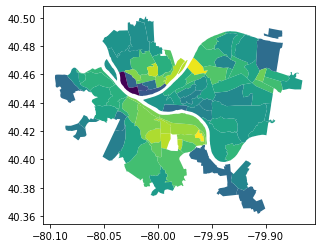

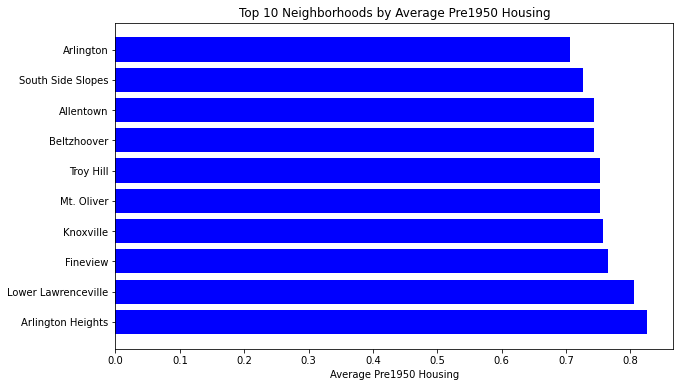

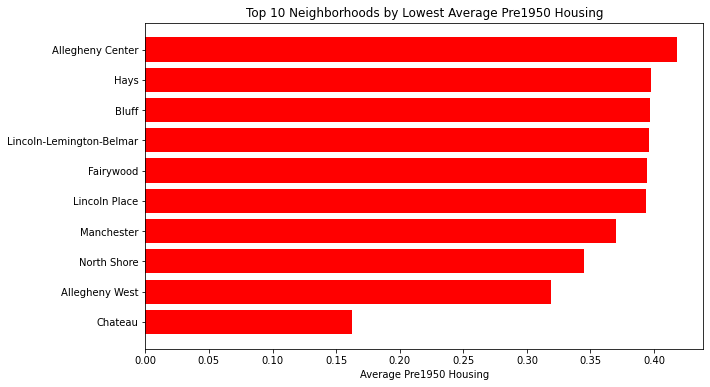

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
data = gpd.read_file('data/Pre1950Housing.shp')
data.head()
# Load neighborhoods
NEIGHBORHOODS = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
NEIGHBORHOODS['pre1950sTotal'] = 0
NEIGHBORHOODS['pre1950sCount'] = 0

for index, row in data.iterrows():
    for index2, row2 in NEIGHBORHOODS.iterrows():
        if row2["geometry"].intersects(row["geometry"]):
            NEIGHBORHOODS.loc[index2, 'pre1950sTotal'] += row['Pre1950']
            NEIGHBORHOODS.loc[index2, 'pre1950sCount'] += 1
            
NEIGHBORHOODS['Average']=NEIGHBORHOODS['pre1950sTotal'] / NEIGHBORHOODS['pre1950sCount']
NEIGHBORHOODS.plot(column = 'Average')
NEIGHBORHOODS.head()

NEIGHBORHOODS = NEIGHBORHOODS.sort_values('Average',ascending = False)



top_10_neighborhoods = NEIGHBORHOODS.iloc[0:10,:]
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['hood'], top_10_neighborhoods['Average'], color='blue')
plt.xlabel('Average Pre1950 Housing')
plt.title('Top 10 Neighborhoods by Average Pre1950 Housing')
plt.show()
NEIGHBORHOODS['hood'].head(10)

NEIGHBORHOODS = NEIGHBORHOODS.sort_values('Average', ascending=True)
lowest_10_neighborhoods = NEIGHBORHOODS.head(10)

# Plot the lowest 10 neighborhoods on a bar graph
plt.figure(figsize=(10, 6))
plt.barh(lowest_10_neighborhoods['hood'], lowest_10_neighborhoods['Average'], color='red')  # Using a different color for visualization
plt.xlabel('Average Pre1950 Housing')
plt.title('Top 10 Neighborhoods by Lowest Average Pre1950 Housing')
plt.show()
            
            
    